In [1]:
# 로이더 뉴스 데이터셋 불러오기
from keras.datasets import reuters

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# seed 값 설정
seed = 0

np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
# 불러온 데이터를 학습셋과 테스트셋으로 나누기 
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [5]:
# 데이터 확인 후 출력
category = np.max(Y_train) + 1
print(category, "카테고리")
print(len(X_train), "학습용 뉴스 기사")
print(len(X_test), "테스트용 뉴스 기사")
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:
# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen = 100)
x_test = sequence.pad_sequences(X_test, maxlen = 100)

In [7]:
# 데이터 전처리
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [8]:
# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation="tanh"))
model.add(Dense(46, activation="softmax"))

In [9]:
# 모델의 컴파일
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [10]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs = 20, validation_data=(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 16s 2ms/step - loss: 2.5544 - accuracy: 0.3671 - val_loss: 2.0771 - val_accuracy: 0.4978
Epoch 2/20
8982/8982 [==============================] - 16s 2ms/step - loss: 1.9963 - accuracy: 0.4863 - val_loss: 1.8627 - val_accuracy: 0.5316
Epoch 3/20
8982/8982 [==============================] - 16s 2ms/step - loss: 1.8089 - accuracy: 0.5302 - val_loss: 1.7647 - val_accuracy: 0.5467
Epoch 4/20
8982/8982 [==============================] - 16s 2ms/step - loss: 1.7227 - accuracy: 0.5558 - val_loss: 1.7026 - val_accuracy: 0.5761
Epoch 5/20
8982/8982 [==============================] - 15s 2ms/step - loss: 1.6503 - accuracy: 0.5697 - val_loss: 1.7653 - val_accuracy: 0.5539
Epoch 6/20
8982/8982 [==============================] - 16s 2ms/step - loss: 1.6117 - accuracy: 0.5803 - val_loss: 1.6713 - val_accuracy: 0.5757
Epoch 7/20
8982/8982 [==============================] - 16s 2ms/step - loss: 1.534

In [11]:
# 테스트 정확도 출력
print("\n Test Accuracy : %.4f"%(model.evaluate(x_test, y_test)[1]))

2246/2246 [==============================] - 1s 479us/step

 Test Accuracy : 0.7133


In [12]:
# 테스트셋의 오차
y_vloss = history.history["val_loss"]

In [13]:
# 학습셋의 오차
y_loss = history.history["loss"]

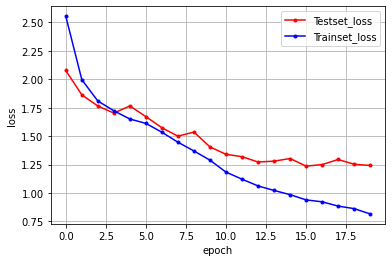

In [14]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = ".", c = "red", label = "Testset_loss")
plt.plot(x_len, y_loss, marker = ".", c = "blue", label = "Trainset_loss")

# 그래프에 그리드를 추가하고 레이블을 표시
plt.legend(loc = "upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()